In [1]:
import pandas as pd
X=pd.read_csv(r"C:\Users\vidya\Downloads\Crop_Yield_Dataset_100k.csv")

In [2]:
# Basic imports
import os
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import joblib


In [3]:
X

,Farmer_ID,Farmer_Name,Region,Crop_Type,Soil_pH,Rainfall_mm,Fertilizer_Type,Fertilizer_Quantity_kg,Pesticide_Used_Liters,Temperature_C,Humidity_Percent,Land_Area_Acres,Yield_Tonnes
0,1,Michael Velazquez,West,Rice,6.45,262.5,Compost,193.4,4.8,20.7,76.9,6.22,2.98
1,2,Johnny Turner,Central,Soybean,6.74,585.7,DAP,19.6,1.9,15.4,38.4,16.53,7.82
2,3,Jason Russell,East,Soybean,6.89,1432.1,Organic,29.2,2.1,34.1,64.6,18.78,4.41
3,4,Jennifer Butler,Central,Wheat,7.88,1239.0,Compost,42.2,6.7,38.4,54.0,4.70,5.47
4,5,Randall Thompson,Central,Maize,7.65,1972.1,Compost,182.2,3.9,34.3,62.1,3.53,7.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Melissa Jefferson DDS,South,Barley,7.74,870.6,DAP,56.7,3.5,18.2,86.9,1.30,2.87
99996,99997,Nathan Turner,North,Wheat,5.95,957.8,DAP,11.4,2.2,33.8,51.0,7.46,6.89
99997,99998,Joshua Stewart,Central,Sugarcane,7.27,1356.6,Organic,71.8,6.0,26.6,67.6,4.66,2.68
99998,99999,David Hines,West,Sugarcane,8.39,1942.6,Organic,24.0,9.5,31.2,52.5,4.02,6.21


In [4]:
X.Crop_Type.unique()

array(['Rice', 'Soybean', 'Wheat', 'Maize', 'Sugarcane', 'Barley',
       'Cotton'], dtype=object)

In [5]:
X.Fertilizer_Type.unique()

array(['Compost', 'DAP', 'Organic', 'Urea', 'NPK'], dtype=object)

In [6]:
x=X.sample(500)
x

,Farmer_ID,Farmer_Name,Region,Crop_Type,Soil_pH,Rainfall_mm,Fertilizer_Type,Fertilizer_Quantity_kg,Pesticide_Used_Liters,Temperature_C,Humidity_Percent,Land_Area_Acres,Yield_Tonnes
411,412,Mary Ortiz,South,Cotton,7.15,1513.2,DAP,70.5,8.8,33.5,73.5,4.56,6.40
477,478,Ryan Combs,North,Wheat,7.50,736.9,NPK,34.0,2.1,16.9,88.1,11.98,3.13
38969,38970,Audrey Johnson,Central,Maize,7.75,1158.9,NPK,181.5,2.3,33.0,57.6,13.80,4.36
36725,36726,Samuel Todd,West,Wheat,5.56,768.5,Urea,163.4,7.1,21.3,82.5,19.86,6.45
64888,64889,Angela Abbott,West,Barley,7.28,510.5,DAP,153.7,8.3,26.6,82.6,13.02,3.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33266,33267,Erica Williams,South,Barley,6.36,1920.0,Organic,106.6,2.4,17.8,43.8,12.98,1.41
63872,63873,Darryl White,South,Soybean,7.29,1901.4,DAP,125.8,8.9,36.1,88.2,13.76,2.62
95173,95174,Sandra Bell,South,Barley,7.27,1456.2,Organic,170.5,2.5,23.3,84.7,5.79,5.43
51255,51256,Kevin Heath,West,Rice,8.38,349.8,DAP,191.8,2.2,28.5,89.4,4.69,5.17


In [7]:
# Show first 5 rows
print("First 5 Rows:")
display(x.head())

First 5 Rows:


,Farmer_ID,Farmer_Name,Region,Crop_Type,Soil_pH,Rainfall_mm,Fertilizer_Type,Fertilizer_Quantity_kg,Pesticide_Used_Liters,Temperature_C,Humidity_Percent,Land_Area_Acres,Yield_Tonnes
411,412,Mary Ortiz,South,Cotton,7.15,1513.2,DAP,70.5,8.8,33.5,73.5,4.56,6.40
477,478,Ryan Combs,North,Wheat,7.50,736.9,NPK,34.0,2.1,16.9,88.1,11.98,3.13
38969,38970,Audrey Johnson,Central,Maize,7.75,1158.9,NPK,181.5,2.3,33.0,57.6,13.80,4.36
36725,36726,Samuel Todd,West,Wheat,5.56,768.5,Urea,163.4,7.1,21.3,82.5,19.86,6.45
64888,64889,Angela Abbott,West,Barley,7.28,510.5,DAP,153.7,8.3,26.6,82.6,13.02,3.79


In [8]:
# Basic shape
print("Dataset Shape:", x.shape)

Dataset Shape: (500, 13)


In [9]:
# Dataset Information
print("Dataset Info:")
print(x.info())

print("\nSummary Statistics:")
display(x.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 411 to 18428
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Farmer_ID               500 non-null    int64  
 1   Farmer_Name             500 non-null    object 
 2   Region                  500 non-null    object 
 3   Crop_Type               500 non-null    object 
 4   Soil_pH                 500 non-null    float64
 5   Rainfall_mm             500 non-null    float64
 6   Fertilizer_Type         500 non-null    object 
 7   Fertilizer_Quantity_kg  500 non-null    float64
 8   Pesticide_Used_Liters   500 non-null    float64
 9   Temperature_C           500 non-null    float64
 10  Humidity_Percent        500 non-null    float64
 11  Land_Area_Acres         500 non-null    float64
 12  Yield_Tonnes            500 non-null    float64
dtypes: float64(8), int64(1), object(4)
memory usage: 54.7+ KB
None

Summary Statistics

,Farmer_ID,Soil_pH,Rainfall_mm,Fertilizer_Quantity_kg,Pesticide_Used_Liters,Temperature_C,Humidity_Percent,Land_Area_Acres,Yield_Tonnes
count,500.00000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.00000,500.000000
mean,47801.98800,6.969720,1103.984400,103.30360,4.842600,27.184200,61.167600,10.93098,5.192560
std,29027.18769,0.879228,533.970214,54.98334,2.933943,7.267418,17.355331,5.48542,2.762656
min,94.00000,5.520000,201.200000,10.00000,0.000000,15.000000,30.100000,1.04000,0.520000
25%,23620.50000,6.177500,651.975000,55.90000,2.300000,20.800000,47.075000,6.25000,2.900000
50%,46080.00000,7.035000,1074.900000,100.85000,4.700000,27.000000,60.900000,10.82500,5.060000
75%,71969.75000,7.700000,1574.675000,152.70000,7.500000,33.425000,76.725000,15.85250,7.705000
max,99872.00000,8.500000,1990.200000,199.50000,9.900000,40.000000,89.900000,19.99000,10.000000


In [10]:
# Check Missing Values
x.isnull().sum()

Farmer_ID                 0
Farmer_Name               0
Region                    0
Crop_Type                 0
Soil_pH                   0
Rainfall_mm               0
Fertilizer_Type           0
Fertilizer_Quantity_kg    0
Pesticide_Used_Liters     0
Temperature_C             0
Humidity_Percent          0
Land_Area_Acres           0
Yield_Tonnes              0
dtype: int64

In [11]:
# % of missing values
(x.isnull().sum()/len(x))*100

Farmer_ID                 0.0
Farmer_Name               0.0
Region                    0.0
Crop_Type                 0.0
Soil_pH                   0.0
Rainfall_mm               0.0
Fertilizer_Type           0.0
Fertilizer_Quantity_kg    0.0
Pesticide_Used_Liters     0.0
Temperature_C             0.0
Humidity_Percent          0.0
Land_Area_Acres           0.0
Yield_Tonnes              0.0
dtype: float64

In [12]:
#Check Duplicates
x.duplicated().sum()

np.int64(0)

In [13]:
x = x.drop_duplicates()
x

,Farmer_ID,Farmer_Name,Region,Crop_Type,Soil_pH,Rainfall_mm,Fertilizer_Type,Fertilizer_Quantity_kg,Pesticide_Used_Liters,Temperature_C,Humidity_Percent,Land_Area_Acres,Yield_Tonnes
411,412,Mary Ortiz,South,Cotton,7.15,1513.2,DAP,70.5,8.8,33.5,73.5,4.56,6.40
477,478,Ryan Combs,North,Wheat,7.50,736.9,NPK,34.0,2.1,16.9,88.1,11.98,3.13
38969,38970,Audrey Johnson,Central,Maize,7.75,1158.9,NPK,181.5,2.3,33.0,57.6,13.80,4.36
36725,36726,Samuel Todd,West,Wheat,5.56,768.5,Urea,163.4,7.1,21.3,82.5,19.86,6.45
64888,64889,Angela Abbott,West,Barley,7.28,510.5,DAP,153.7,8.3,26.6,82.6,13.02,3.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33266,33267,Erica Williams,South,Barley,6.36,1920.0,Organic,106.6,2.4,17.8,43.8,12.98,1.41
63872,63873,Darryl White,South,Soybean,7.29,1901.4,DAP,125.8,8.9,36.1,88.2,13.76,2.62
95173,95174,Sandra Bell,South,Barley,7.27,1456.2,Organic,170.5,2.5,23.3,84.7,5.79,5.43
51255,51256,Kevin Heath,West,Rice,8.38,349.8,DAP,191.8,2.2,28.5,89.4,4.69,5.17


In [14]:
m=x.iloc[0:10,0:]
m

,Farmer_ID,Farmer_Name,Region,Crop_Type,Soil_pH,Rainfall_mm,Fertilizer_Type,Fertilizer_Quantity_kg,Pesticide_Used_Liters,Temperature_C,Humidity_Percent,Land_Area_Acres,Yield_Tonnes
411,412,Mary Ortiz,South,Cotton,7.15,1513.2,DAP,70.5,8.8,33.5,73.5,4.56,6.40
477,478,Ryan Combs,North,Wheat,7.50,736.9,NPK,34.0,2.1,16.9,88.1,11.98,3.13
38969,38970,Audrey Johnson,Central,Maize,7.75,1158.9,NPK,181.5,2.3,33.0,57.6,13.80,4.36
36725,36726,Samuel Todd,West,Wheat,5.56,768.5,Urea,163.4,7.1,21.3,82.5,19.86,6.45
64888,64889,Angela Abbott,West,Barley,7.28,510.5,DAP,153.7,8.3,26.6,82.6,13.02,3.79
91280,91281,Melissa Williams,North,Soybean,8.35,1979.2,NPK,170.2,7.2,34.2,31.9,18.78,9.21
69449,69450,Andrew Garza,North,Wheat,5.60,385.8,Organic,60.0,2.9,19.8,69.6,16.54,3.05
76615,76616,Michael Kim,East,Sugarcane,6.85,289.1,Compost,139.8,0.4,20.1,66.6,9.23,0.76
90629,90630,Monica Obrien,West,Rice,6.17,1780.1,NPK,103.3,6.4,21.6,58.7,2.52,3.00
25354,25355,Linda Mckay,East,Maize,5.90,744.0,Compost,48.3,7.5,28.5,86.3,5.62,5.03


In [15]:
x.columns

Index(['Farmer_ID', 'Farmer_Name', 'Region', 'Crop_Type', 'Soil_pH',
       'Rainfall_mm', 'Fertilizer_Type', 'Fertilizer_Quantity_kg',
       'Pesticide_Used_Liters', 'Temperature_C', 'Humidity_Percent',
       'Land_Area_Acres', 'Yield_Tonnes'],
      dtype='object')

## EDA: It reveals patterns and helps in feature selection and provides guidance for model building

### 1.Crop-wise average yield

In [118]:
crop_yield = m.groupby("Crop_Type")["Yield_Tonnes"].mean().sort_values(ascending=False)
crop_yield

Crop_Type
Soybean      9.210
Cotton       6.400
Maize        4.695
Wheat        4.210
Barley       3.790
Rice         3.000
Sugarcane    0.760
Name: Yield_Tonnes, dtype: float64

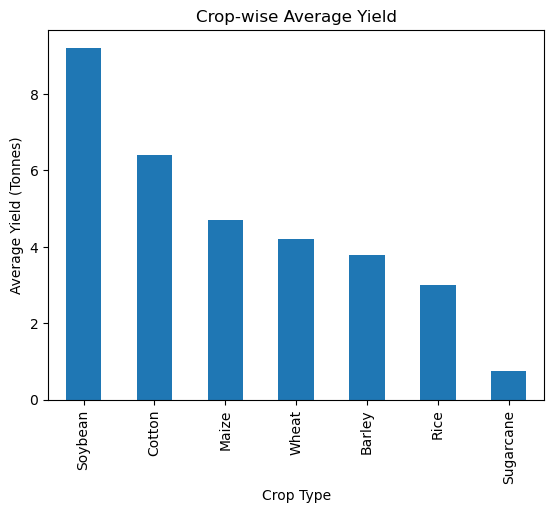

In [119]:
plt.figure()
crop_yield.plot(kind="bar")
plt.title("Crop-wise Average Yield")
plt.ylabel("Average Yield (Tonnes)")
plt.xlabel("Crop Type")
plt.show()

### 2. Region-wise Production

In [121]:
region_yield = m.groupby("Region")["Yield_Tonnes"].sum().sort_values(ascending=False)
region_yield

Region
North      15.39
West       13.24
South       6.40
East        5.79
Central     4.36
Name: Yield_Tonnes, dtype: float64

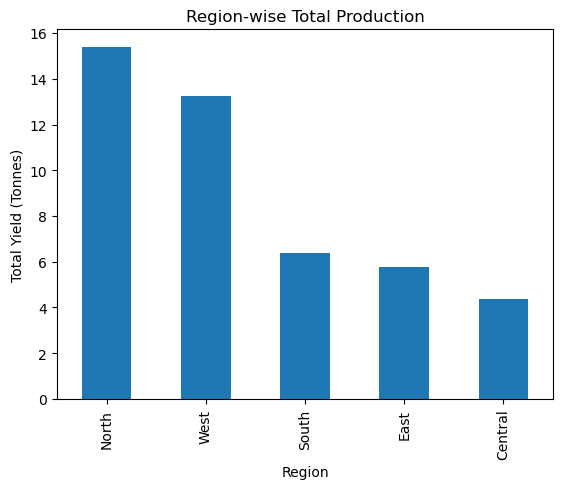

In [122]:
plt.figure()
region_yield.plot(kind="bar")
plt.title("Region-wise Total Production")
plt.ylabel("Total Yield (Tonnes)")
plt.xlabel("Region")
plt.show()

### 3. Fertilizer Impact Analysis

### (a) Fertilizer Type vs Yield

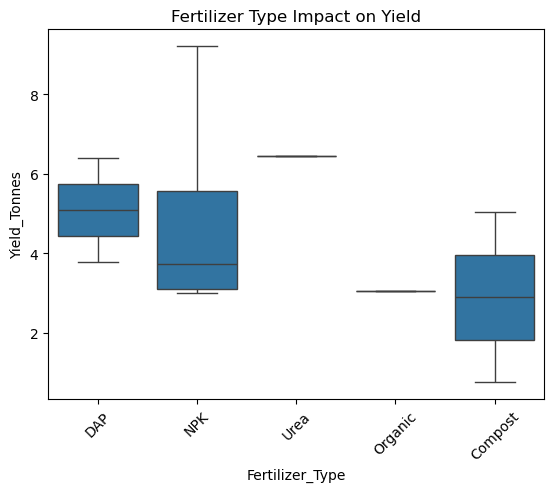

In [125]:
plt.figure()
sns.boxplot(x="Fertilizer_Type", y="Yield_Tonnes", data=m)
plt.title("Fertilizer Type Impact on Yield")
plt.xticks(rotation=45)
plt.show()


### (b) Fertilizer Quantity vs Yield

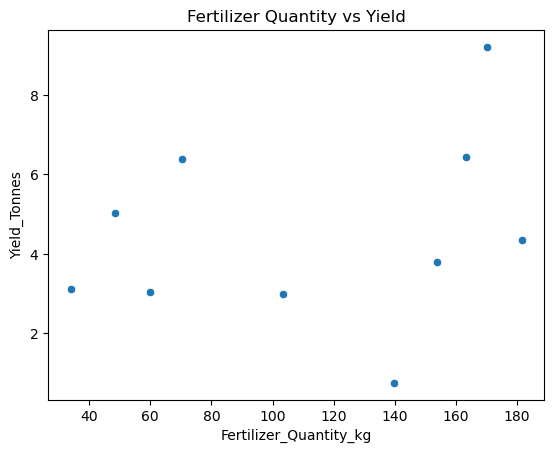

In [126]:
plt.figure()
sns.scatterplot(
    x="Fertilizer_Quantity_kg",
    y="Yield_Tonnes",
    data=m
)
plt.title("Fertilizer Quantity vs Yield")
plt.show()


### 4. Rainfall vs Yield Relationship

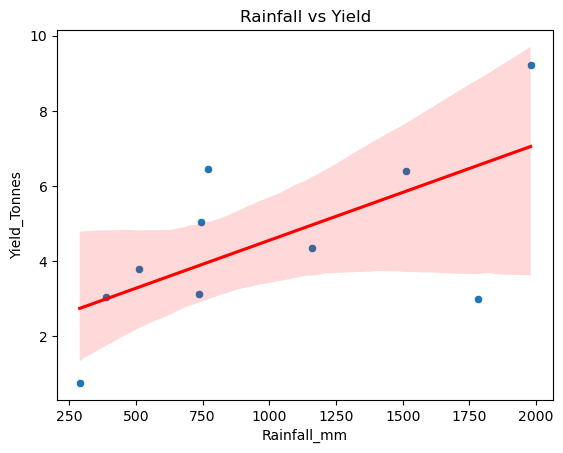

In [134]:
plt.figure()
sns.scatterplot(x="Rainfall_mm", y="Yield_Tonnes", data=m)
sns.regplot(
    x="Rainfall_mm",
    y="Yield_Tonnes",
    data=m,
    scatter=False,
    color="red"
)
plt.title("Rainfall vs Yield")
plt.show()


### 5. Temperature Stress Impact

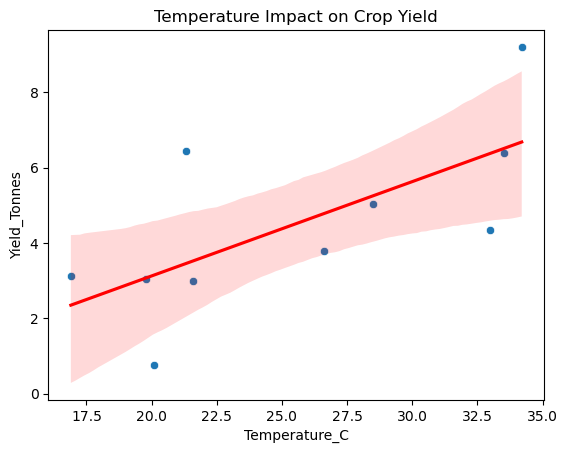

In [129]:
plt.figure()
sns.scatterplot(x="Temperature_C", y="Yield_Tonnes", data=m)
sns.regplot(
    x="Temperature_C",
    y="Yield_Tonnes",
    data=m,
    scatter=False,
    color="red"
)
plt.title("Temperature Impact on Crop Yield")
plt.show()


### 6. Soil pH vs Crop Performance

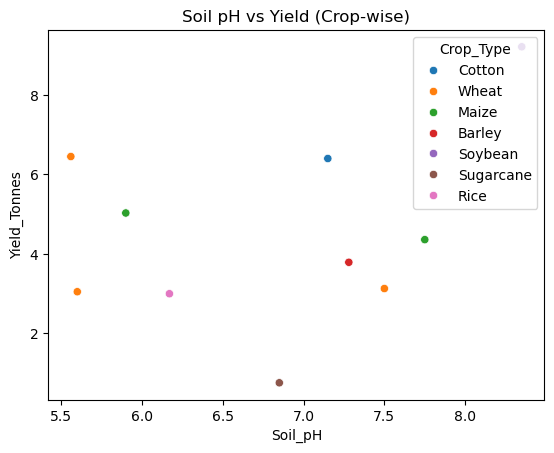

In [130]:
plt.figure()
sns.scatterplot(x="Soil_pH", y="Yield_Tonnes", hue="Crop_Type", data=m)
plt.title("Soil pH vs Yield (Crop-wise)")
plt.show()


### 7. Distribution Graphs (Yield, Rainfall, Temperature)

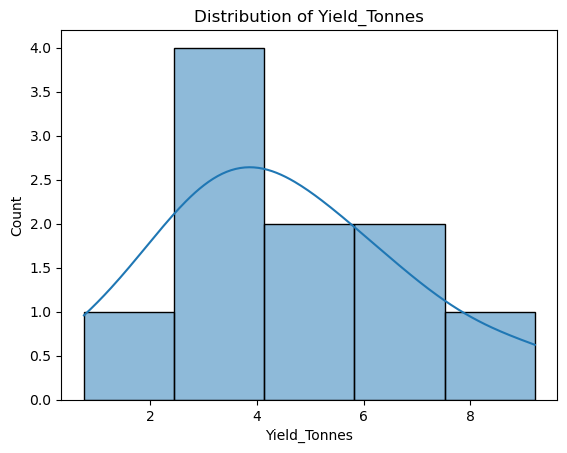

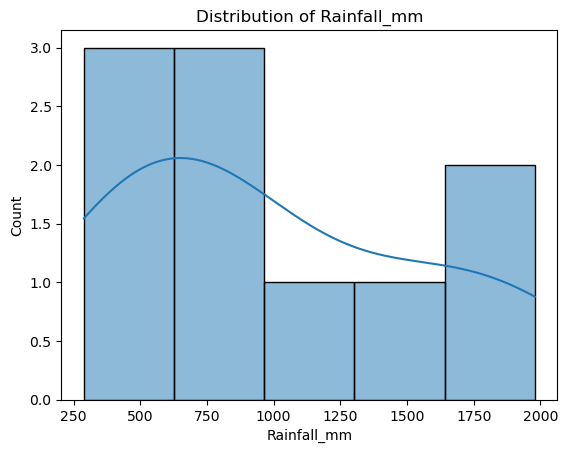

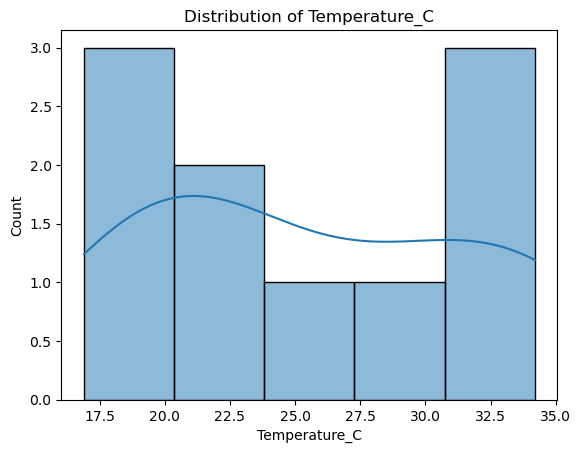

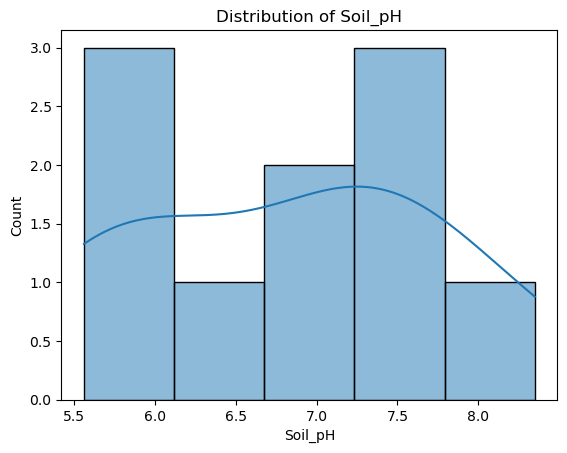

In [131]:
numeric_cols = [
    "Yield_Tonnes",
    "Rainfall_mm",
    "Temperature_C",
    "Soil_pH"
]

for col in numeric_cols:
    plt.figure()
    sns.histplot(m[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


### 8. Boxplots (Outlier Detection)

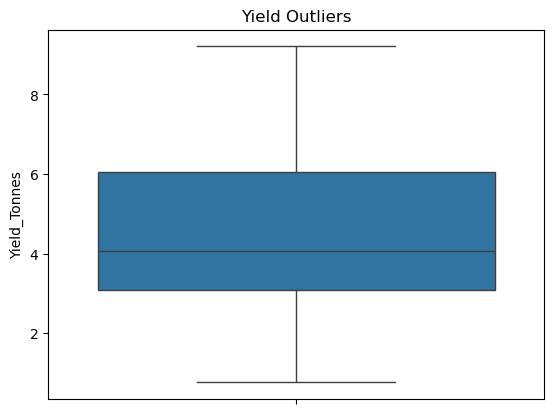

In [132]:
plt.figure()
sns.boxplot(y=m["Yield_Tonnes"])
plt.title("Yield Outliers")
plt.show()


# 1. Pie Chart using Average Yield by Farmer name

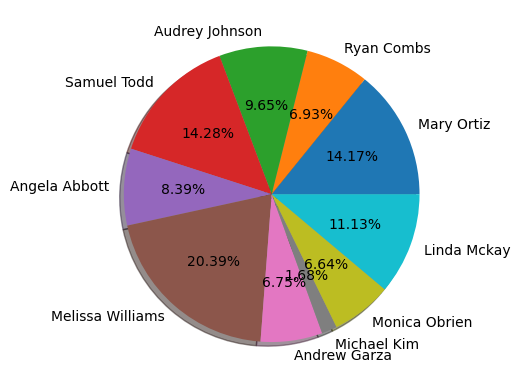

In [16]:
plt.pie(m["Yield_Tonnes"],labels=m["Farmer_Name"],shadow=True,autopct="%.2f%%")
plt.show()# label is outside pie name and inside range is farmer name

# 2. Total Yield by Region


In [17]:
m.groupby(["Farmer_Name","Region"])["Yield_Tonnes"].sum().reset_index()


,Farmer_Name,Region,Yield_Tonnes
0,Andrew Garza,North,3.05
1,Angela Abbott,West,3.79
2,Audrey Johnson,Central,4.36
3,Linda Mckay,East,5.03
4,Mary Ortiz,South,6.40
5,Melissa Williams,North,9.21
6,Michael Kim,East,0.76
7,Monica Obrien,West,3.00
8,Ryan Combs,North,3.13
9,Samuel Todd,West,6.45


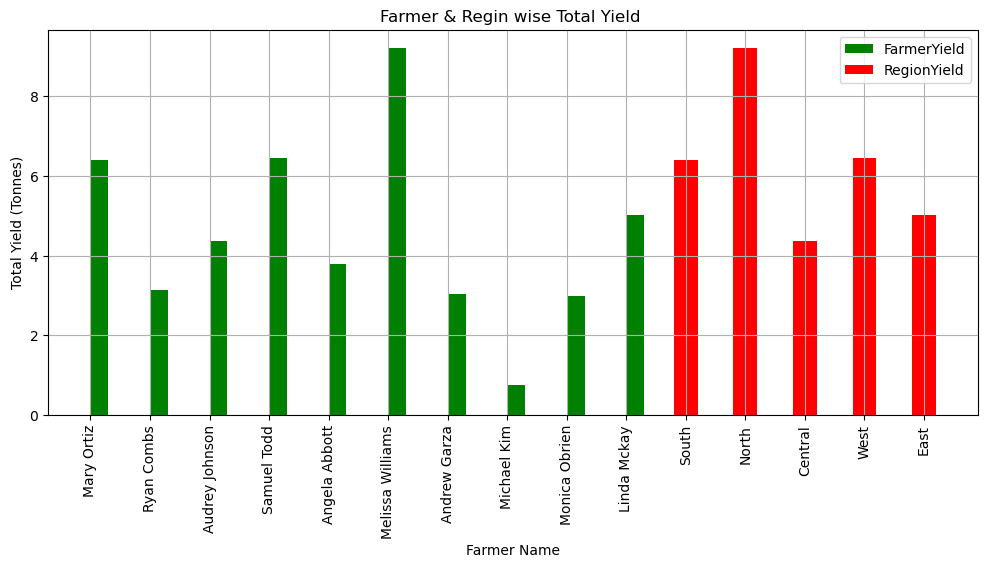

In [18]:
plt.figure(figsize=(12,5))
plt.bar(m["Farmer_Name"],m["Yield_Tonnes"],color="g",width=0.3,align="edge",label="FarmerYield")
plt.bar(m["Region"],m["Yield_Tonnes"],color="r",width=0.4,align="center",label="RegionYield")
plt.xlabel("Farmer Name")
plt.ylabel("Total Yield (Tonnes)")
plt.title("Farmer & Regin wise Total Yield ")
plt.xticks(rotation=90)
plt.grid()
plt.legend()
plt.show()



# 3. Average Yield by Regin

In [19]:
m.groupby("Region")["Yield_Tonnes"].mean()


Region
Central    4.360000
East       2.895000
North      5.130000
South      6.400000
West       4.413333
Name: Yield_Tonnes, dtype: float64

# 4.Total Yield byCrop_Type

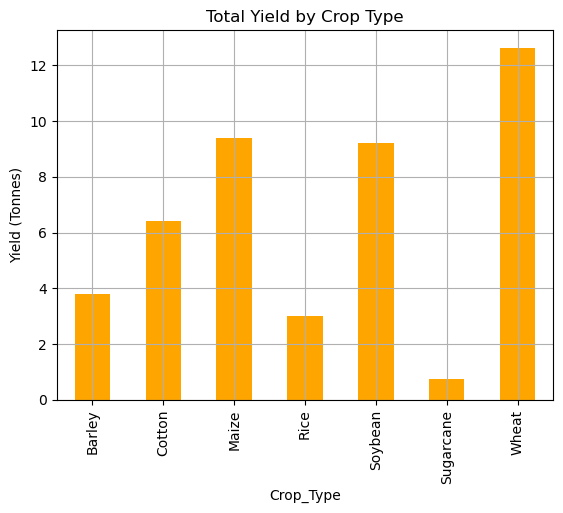

In [20]:
m.groupby("Crop_Type")["Yield_Tonnes"].sum().plot(kind="bar",color="orange")
plt.title("Total Yield by Crop Type")
plt.ylabel("Yield (Tonnes)")
plt.grid()
plt.show()


# 5.Farmer Count by Region

In [21]:
m.groupby("Region")[["Farmer_Name"]].sum().reset_index()


,Region,Farmer_Name
0,Central,Audrey Johnson
1,East,Michael KimLinda Mckay
2,North,Ryan CombsMelissa WilliamsAndrew Garza
3,South,Mary Ortiz
4,West,Samuel ToddAngela AbbottMonica Obrien


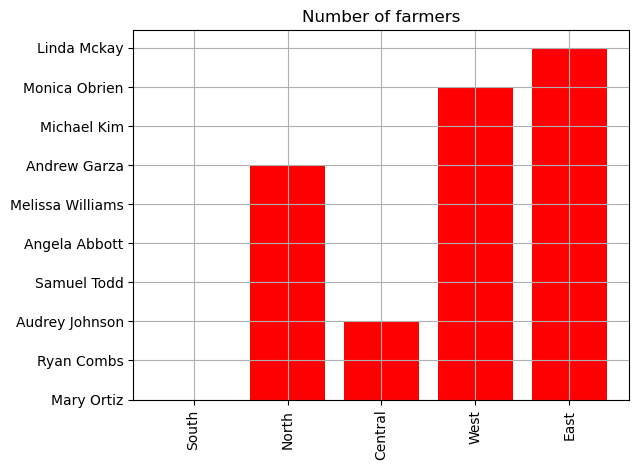

In [22]:
plt.bar(m["Region"],m["Farmer_Name"],color="red")
plt.title("Number of farmers")
plt.xticks(rotation=90)
plt.grid()
plt.show()


# 6. Fertilizer_Type vs Yield (Boxplot)

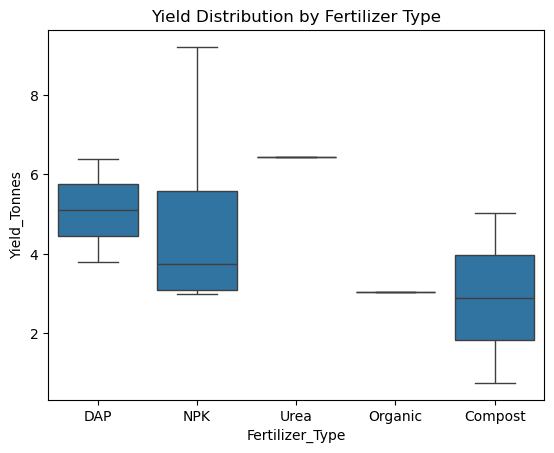

In [23]:
sns.boxplot(x="Fertilizer_Type", y="Yield_Tonnes", data=m)
plt.title("Yield Distribution by Fertilizer Type")
plt.show()


# 7. Land_Area vs Yield

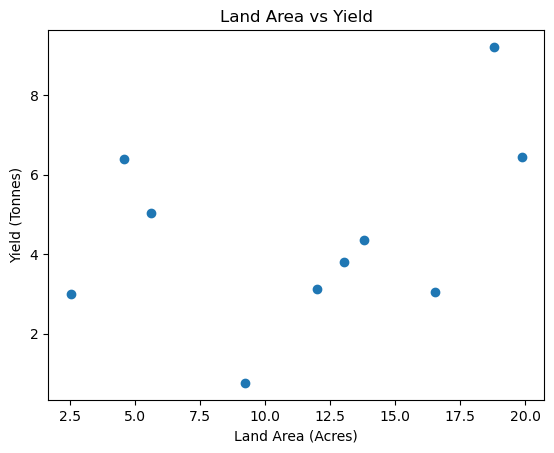

In [24]:
plt.scatter(m["Land_Area_Acres"], m["Yield_Tonnes"])
plt.xlabel("Land Area (Acres)")
plt.ylabel("Yield (Tonnes)")
plt.title("Land Area vs Yield")
plt.show()


# 8. Soil_pH Average by Region

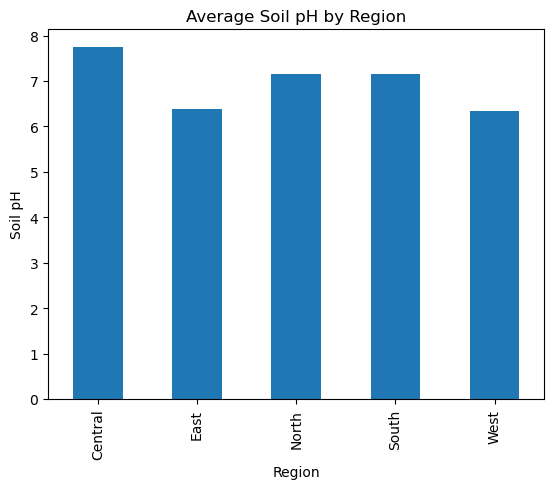

In [25]:
m.groupby("Region")["Soil_pH"].mean().plot(kind="bar")
plt.title("Average Soil pH by Region")
plt.ylabel("Soil pH")
plt.show()


# 9. Humidity vs Yield

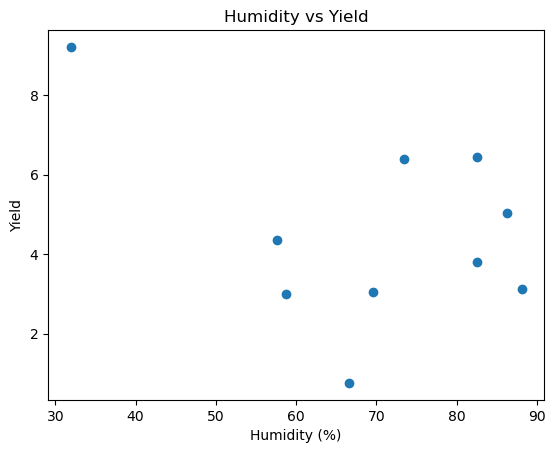

In [26]:
plt.scatter(m["Humidity_Percent"], m["Yield_Tonnes"])
plt.xlabel("Humidity (%)")
plt.ylabel("Yield")
plt.title("Humidity vs Yield")
plt.show()


# 10. Boxplot ( numerical continuous ) :-- For Outlier check use


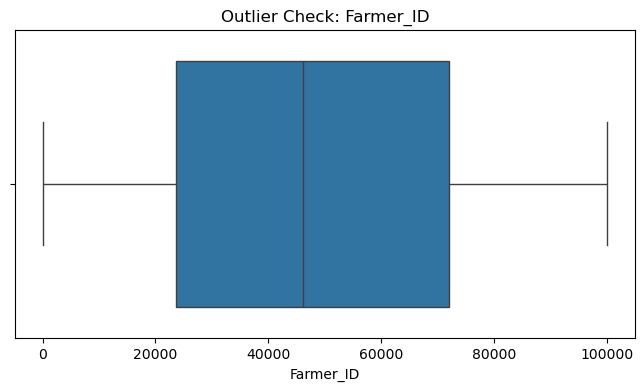

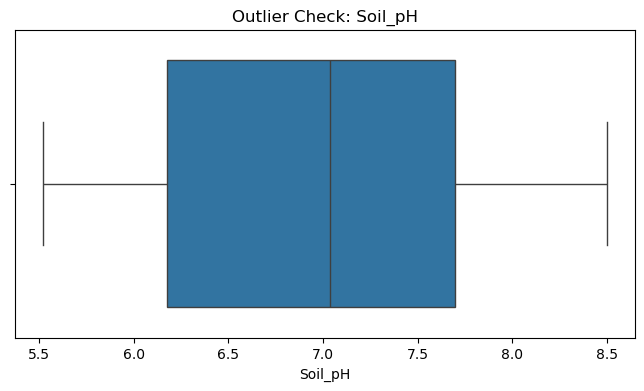

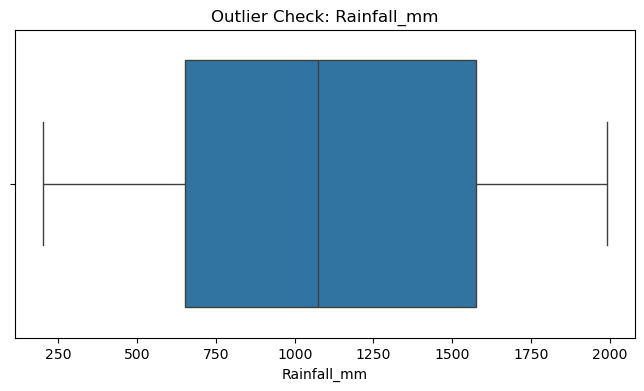

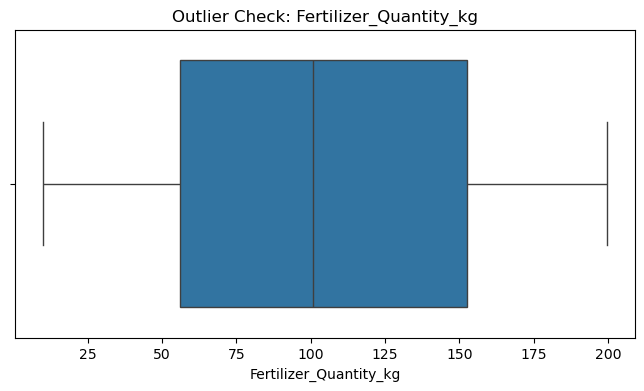

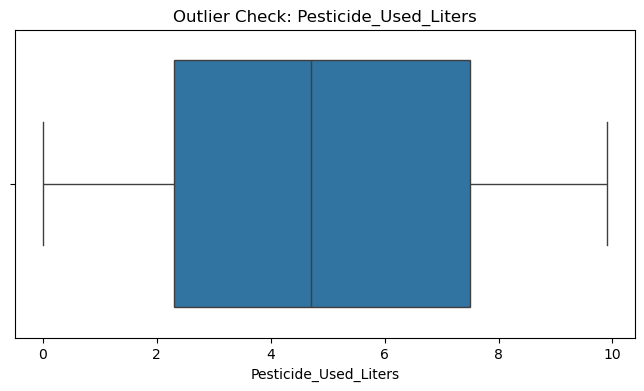

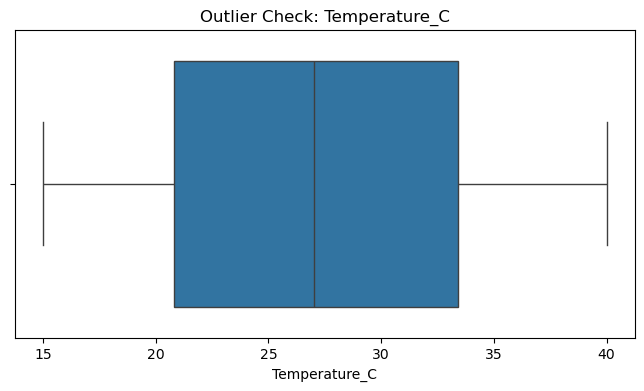

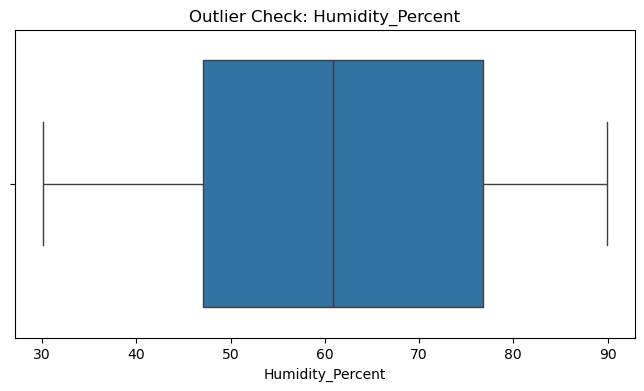

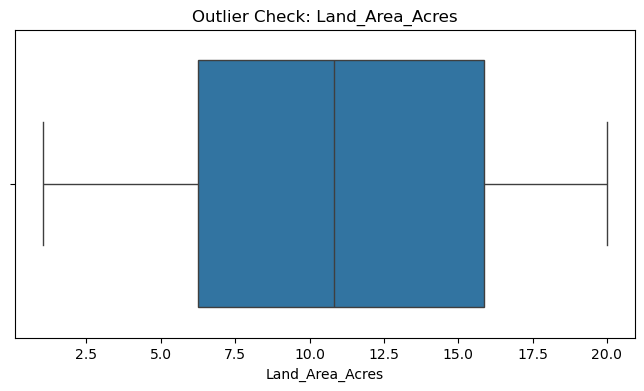

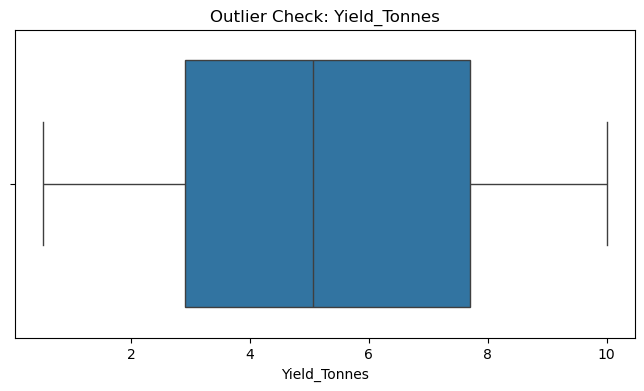

In [27]:
num_cols = x.select_dtypes(include=['float64','int64']).columns

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=x[col])
    plt.title(f"Outlier Check: {col}")
    plt.show()

# 11. — Column-wise Analysis

###  3. Unique values for categorical columns

In [28]:
for col in x.select_dtypes(include='object').columns:
    print(col, "→", x[col].nunique(), "unique values")
    print(x[col].unique())
    print("\n")

Farmer_Name → 498 unique values
['Mary Ortiz' 'Ryan Combs' 'Audrey Johnson' 'Samuel Todd' 'Angela Abbott'
 'Melissa Williams' 'Andrew Garza' 'Michael Kim' 'Monica Obrien'
 'Linda Mckay' 'Michael Ferrell' 'Michael Gray' 'Chad Lewis'
 'Charles Tucker' 'Stephen Goodwin' 'Andrew Andrews' 'Kevin Jones'
 'Lindsey Rose' 'Katherine Ellis' 'Kathryn Hendrix' 'Diane Gordon'
 'Leslie Flores' 'Amy Smith' 'Richard Garza' 'Rebecca Rush' 'Todd Leon'
 'Leslie Serrano' 'Sierra Wall' 'Sherry Fields' 'Rebecca Rivera'
 'Scott Jones' 'Crystal Hall' 'Benjamin Rowe' 'Larry Gordon'
 'Tammy Compton' 'Kara Murray' 'John Hudson' 'David Rowland'
 'Daniel Collins' 'Lydia Patel' 'Chris Davis' 'Phillip Estes'
 'Jaime Mcdonald' 'Allison Knight' 'Rebecca Bryant' 'Yolanda Brown'
 'Lauren Ferguson' 'Erica Hansen' 'Raven Flores'
 'Mrs. Michelle Richardson DDS' 'Destiny Carter' 'Jose Calderon'
 'Tiffany Rivera' 'Kyle Higgins' 'Kendra Davis' 'Timothy Thomas'
 'Katherine Molina MD' 'Sierra Horton' 'Sarah Smith' 'Michael Bend

### Label Encoding ( for High unique values )

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
x['Farmer_Name'] = le.fit_transform(x['Farmer_Name'])
x['Farmer_Name']

411      326
477      412
38969     40
36725    417
64888     28
        ... 
33266    167
63872    120
95173    419
51255    280
18428     95
Name: Farmer_Name, Length: 500, dtype: int64

In [30]:
df = pd.get_dummies(x, columns=['Region','Crop_Type','Fertilizer_Type'], drop_first=True).replace({True:1,False:0})


In [31]:
df

,Farmer_ID,Farmer_Name,Soil_pH,Rainfall_mm,Fertilizer_Quantity_kg,Pesticide_Used_Liters,Temperature_C,Humidity_Percent,Land_Area_Acres,Yield_Tonnes,...,Crop_Type_Cotton,Crop_Type_Maize,Crop_Type_Rice,Crop_Type_Soybean,Crop_Type_Sugarcane,Crop_Type_Wheat,Fertilizer_Type_DAP,Fertilizer_Type_NPK,Fertilizer_Type_Organic,Fertilizer_Type_Urea
411,412,326,7.15,1513.2,70.5,8.8,33.5,73.5,4.56,6.40,...,1,0,0,0,0,0,1,0,0,0
477,478,412,7.50,736.9,34.0,2.1,16.9,88.1,11.98,3.13,...,0,0,0,0,0,1,0,1,0,0
38969,38970,40,7.75,1158.9,181.5,2.3,33.0,57.6,13.80,4.36,...,0,1,0,0,0,0,0,1,0,0
36725,36726,417,5.56,768.5,163.4,7.1,21.3,82.5,19.86,6.45,...,0,0,0,0,0,1,0,0,0,1
64888,64889,28,7.28,510.5,153.7,8.3,26.6,82.6,13.02,3.79,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33266,33267,167,6.36,1920.0,106.6,2.4,17.8,43.8,12.98,1.41,...,0,0,0,0,0,0,0,0,1,0
63872,63873,120,7.29,1901.4,125.8,8.9,36.1,88.2,13.76,2.62,...,0,0,0,1,0,0,1,0,0,0
95173,95174,419,7.27,1456.2,170.5,2.5,23.3,84.7,5.79,5.43,...,0,0,0,0,0,0,0,0,1,0
51255,51256,280,8.38,349.8,191.8,2.2,28.5,89.4,4.69,5.17,...,0,0,1,0,0,0,1,0,0,0


In [32]:
s=df.iloc[0:10,0:5]
s

,Farmer_ID,Farmer_Name,Soil_pH,Rainfall_mm,Fertilizer_Quantity_kg
411,412,326,7.15,1513.2,70.5
477,478,412,7.50,736.9,34.0
38969,38970,40,7.75,1158.9,181.5
36725,36726,417,5.56,768.5,163.4
64888,64889,28,7.28,510.5,153.7
91280,91281,340,8.35,1979.2,170.2
69449,69450,23,5.60,385.8,60.0
76615,76616,351,6.85,289.1,139.8
90629,90630,366,6.17,1780.1,103.3
25354,25355,302,5.90,744.0,48.3


# 1. Univariate (distributions)

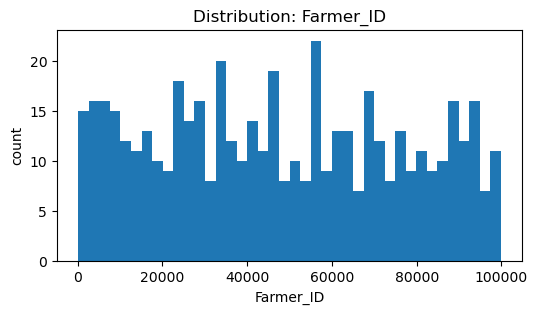

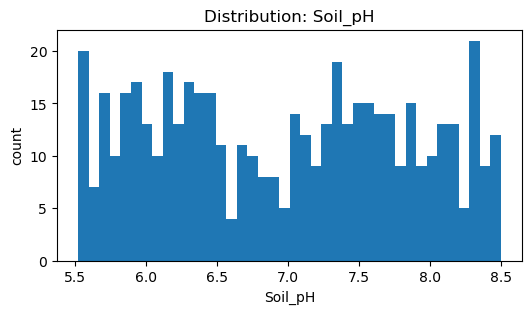

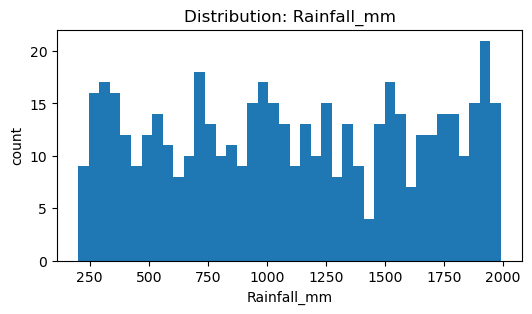

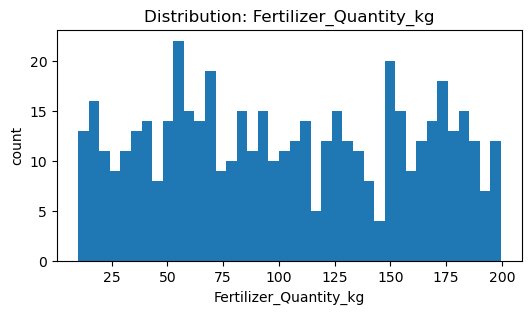

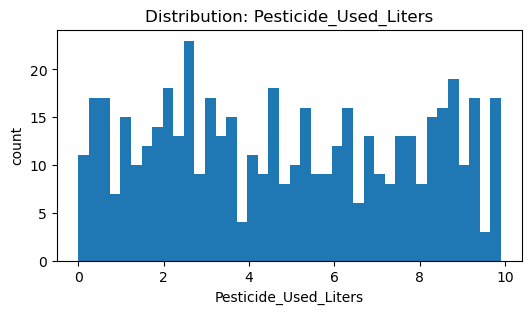

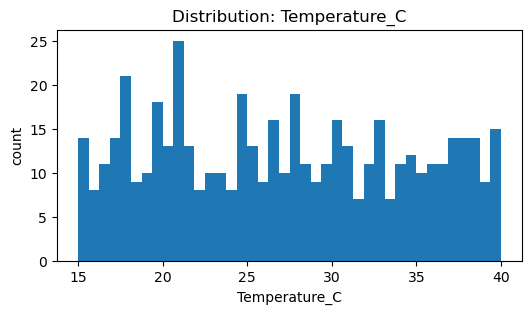

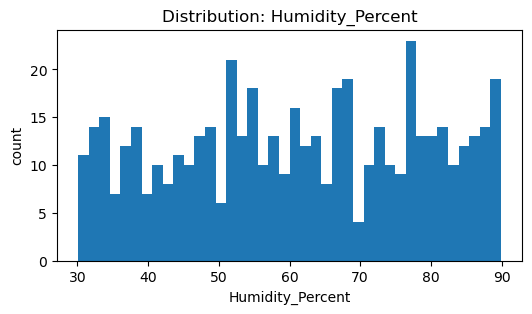

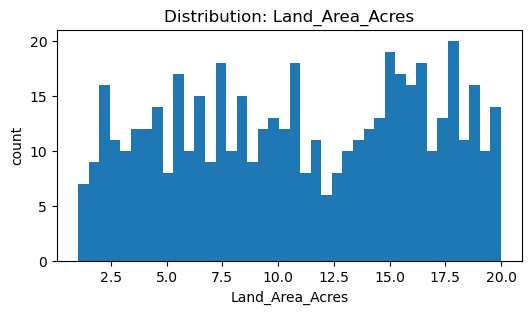

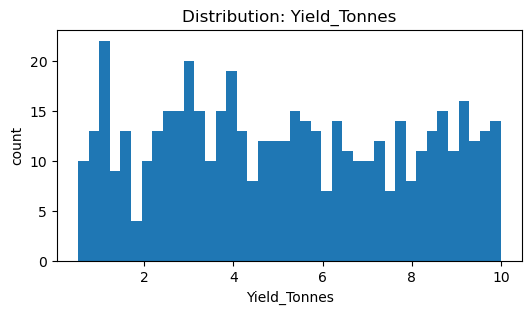

In [33]:
for col in num_cols:
    plt.figure(figsize=(6,3))
    plt.hist(df[col], bins=40)
    plt.title(f'Distribution: {col}')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()


# 2.  Bivariate & Correlation

### 1.Correlation matrix for numerical features

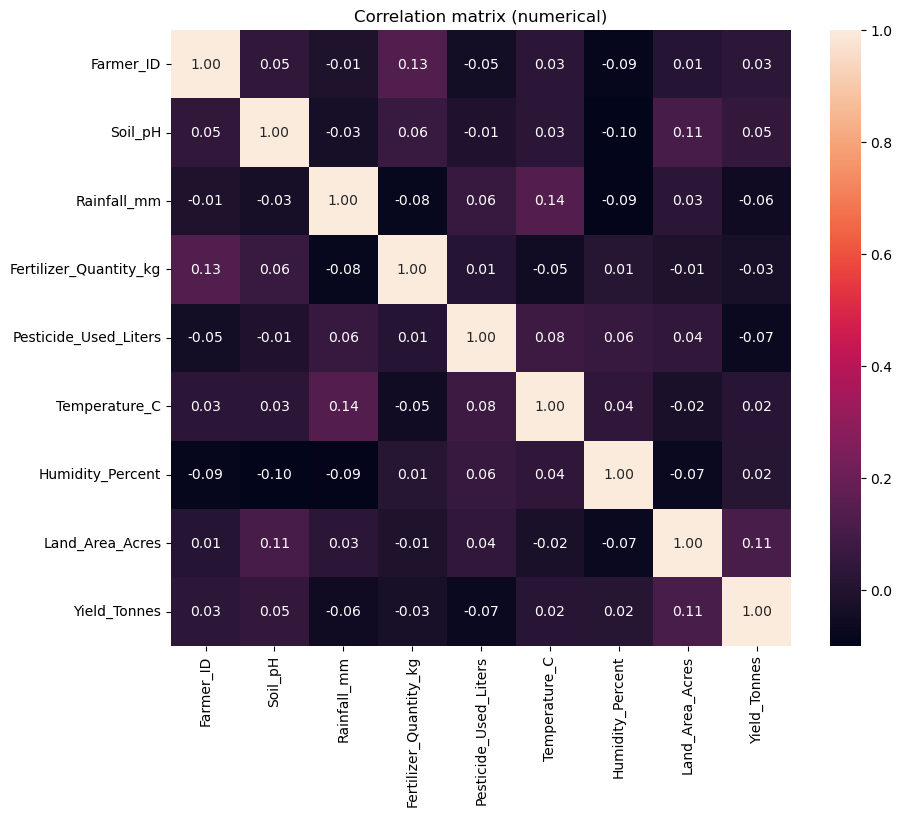

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f")
plt.title("Correlation matrix (numerical)")
plt.show()

In [35]:
df

,Farmer_ID,Farmer_Name,Soil_pH,Rainfall_mm,Fertilizer_Quantity_kg,Pesticide_Used_Liters,Temperature_C,Humidity_Percent,Land_Area_Acres,Yield_Tonnes,...,Crop_Type_Cotton,Crop_Type_Maize,Crop_Type_Rice,Crop_Type_Soybean,Crop_Type_Sugarcane,Crop_Type_Wheat,Fertilizer_Type_DAP,Fertilizer_Type_NPK,Fertilizer_Type_Organic,Fertilizer_Type_Urea
411,412,326,7.15,1513.2,70.5,8.8,33.5,73.5,4.56,6.40,...,1,0,0,0,0,0,1,0,0,0
477,478,412,7.50,736.9,34.0,2.1,16.9,88.1,11.98,3.13,...,0,0,0,0,0,1,0,1,0,0
38969,38970,40,7.75,1158.9,181.5,2.3,33.0,57.6,13.80,4.36,...,0,1,0,0,0,0,0,1,0,0
36725,36726,417,5.56,768.5,163.4,7.1,21.3,82.5,19.86,6.45,...,0,0,0,0,0,1,0,0,0,1
64888,64889,28,7.28,510.5,153.7,8.3,26.6,82.6,13.02,3.79,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33266,33267,167,6.36,1920.0,106.6,2.4,17.8,43.8,12.98,1.41,...,0,0,0,0,0,0,0,0,1,0
63872,63873,120,7.29,1901.4,125.8,8.9,36.1,88.2,13.76,2.62,...,0,0,0,1,0,0,1,0,0,0
95173,95174,419,7.27,1456.2,170.5,2.5,23.3,84.7,5.79,5.43,...,0,0,0,0,0,0,0,0,1,0
51255,51256,280,8.38,349.8,191.8,2.2,28.5,89.4,4.69,5.17,...,0,0,1,0,0,0,1,0,0,0


### 2. Bivariate using scatter plot i.e reltionship between 2 variables.

In [36]:
s=df.iloc[0:10,0:]
s

,Farmer_ID,Farmer_Name,Soil_pH,Rainfall_mm,Fertilizer_Quantity_kg,Pesticide_Used_Liters,Temperature_C,Humidity_Percent,Land_Area_Acres,Yield_Tonnes,...,Crop_Type_Cotton,Crop_Type_Maize,Crop_Type_Rice,Crop_Type_Soybean,Crop_Type_Sugarcane,Crop_Type_Wheat,Fertilizer_Type_DAP,Fertilizer_Type_NPK,Fertilizer_Type_Organic,Fertilizer_Type_Urea
411,412,326,7.15,1513.2,70.5,8.8,33.5,73.5,4.56,6.40,...,1,0,0,0,0,0,1,0,0,0
477,478,412,7.50,736.9,34.0,2.1,16.9,88.1,11.98,3.13,...,0,0,0,0,0,1,0,1,0,0
38969,38970,40,7.75,1158.9,181.5,2.3,33.0,57.6,13.80,4.36,...,0,1,0,0,0,0,0,1,0,0
36725,36726,417,5.56,768.5,163.4,7.1,21.3,82.5,19.86,6.45,...,0,0,0,0,0,1,0,0,0,1
64888,64889,28,7.28,510.5,153.7,8.3,26.6,82.6,13.02,3.79,...,0,0,0,0,0,0,1,0,0,0
91280,91281,340,8.35,1979.2,170.2,7.2,34.2,31.9,18.78,9.21,...,0,0,0,1,0,0,0,1,0,0
69449,69450,23,5.60,385.8,60.0,2.9,19.8,69.6,16.54,3.05,...,0,0,0,0,0,1,0,0,1,0
76615,76616,351,6.85,289.1,139.8,0.4,20.1,66.6,9.23,0.76,...,0,0,0,0,1,0,0,0,0,0
90629,90630,366,6.17,1780.1,103.3,6.4,21.6,58.7,2.52,3.00,...,0,0,1,0,0,0,0,1,0,0
25354,25355,302,5.90,744.0,48.3,7.5,28.5,86.3,5.62,5.03,...,0,1,0,0,0,0,0,0,0,0


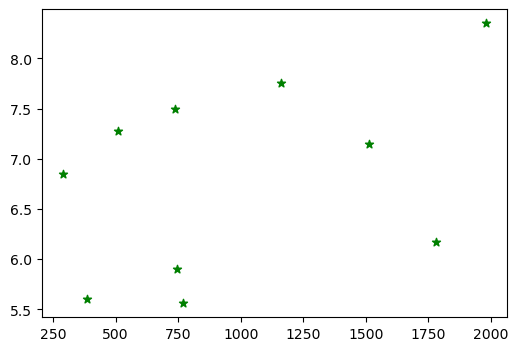

In [37]:
 
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.scatter(s['Rainfall_mm'], s['Soil_pH'],c="green",marker="*")
plt.show()

In [38]:
df.to_csv(r"D:\WTT Advanced Python\All Data Science Project\DS 3rd Crop Yield Prediction (AI + ML Project)\Cleaned_data.csv",index=False)
df

,Farmer_ID,Farmer_Name,Soil_pH,Rainfall_mm,Fertilizer_Quantity_kg,Pesticide_Used_Liters,Temperature_C,Humidity_Percent,Land_Area_Acres,Yield_Tonnes,...,Crop_Type_Cotton,Crop_Type_Maize,Crop_Type_Rice,Crop_Type_Soybean,Crop_Type_Sugarcane,Crop_Type_Wheat,Fertilizer_Type_DAP,Fertilizer_Type_NPK,Fertilizer_Type_Organic,Fertilizer_Type_Urea
411,412,326,7.15,1513.2,70.5,8.8,33.5,73.5,4.56,6.40,...,1,0,0,0,0,0,1,0,0,0
477,478,412,7.50,736.9,34.0,2.1,16.9,88.1,11.98,3.13,...,0,0,0,0,0,1,0,1,0,0
38969,38970,40,7.75,1158.9,181.5,2.3,33.0,57.6,13.80,4.36,...,0,1,0,0,0,0,0,1,0,0
36725,36726,417,5.56,768.5,163.4,7.1,21.3,82.5,19.86,6.45,...,0,0,0,0,0,1,0,0,0,1
64888,64889,28,7.28,510.5,153.7,8.3,26.6,82.6,13.02,3.79,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33266,33267,167,6.36,1920.0,106.6,2.4,17.8,43.8,12.98,1.41,...,0,0,0,0,0,0,0,0,1,0
63872,63873,120,7.29,1901.4,125.8,8.9,36.1,88.2,13.76,2.62,...,0,0,0,1,0,0,1,0,0,0
95173,95174,419,7.27,1456.2,170.5,2.5,23.3,84.7,5.79,5.43,...,0,0,0,0,0,0,0,0,1,0
51255,51256,280,8.38,349.8,191.8,2.2,28.5,89.4,4.69,5.17,...,0,0,1,0,0,0,1,0,0,0


In [39]:
print(df.columns)


Index(['Farmer_ID', 'Farmer_Name', 'Soil_pH', 'Rainfall_mm',
       'Fertilizer_Quantity_kg', 'Pesticide_Used_Liters', 'Temperature_C',
       'Humidity_Percent', 'Land_Area_Acres', 'Yield_Tonnes', 'Region_East',
       'Region_North', 'Region_South', 'Region_West', 'Crop_Type_Cotton',
       'Crop_Type_Maize', 'Crop_Type_Rice', 'Crop_Type_Soybean',
       'Crop_Type_Sugarcane', 'Crop_Type_Wheat', 'Fertilizer_Type_DAP',
       'Fertilizer_Type_NPK', 'Fertilizer_Type_Organic',
       'Fertilizer_Type_Urea'],
      dtype='object')


In [40]:
df

,Farmer_ID,Farmer_Name,Soil_pH,Rainfall_mm,Fertilizer_Quantity_kg,Pesticide_Used_Liters,Temperature_C,Humidity_Percent,Land_Area_Acres,Yield_Tonnes,...,Crop_Type_Cotton,Crop_Type_Maize,Crop_Type_Rice,Crop_Type_Soybean,Crop_Type_Sugarcane,Crop_Type_Wheat,Fertilizer_Type_DAP,Fertilizer_Type_NPK,Fertilizer_Type_Organic,Fertilizer_Type_Urea
411,412,326,7.15,1513.2,70.5,8.8,33.5,73.5,4.56,6.40,...,1,0,0,0,0,0,1,0,0,0
477,478,412,7.50,736.9,34.0,2.1,16.9,88.1,11.98,3.13,...,0,0,0,0,0,1,0,1,0,0
38969,38970,40,7.75,1158.9,181.5,2.3,33.0,57.6,13.80,4.36,...,0,1,0,0,0,0,0,1,0,0
36725,36726,417,5.56,768.5,163.4,7.1,21.3,82.5,19.86,6.45,...,0,0,0,0,0,1,0,0,0,1
64888,64889,28,7.28,510.5,153.7,8.3,26.6,82.6,13.02,3.79,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33266,33267,167,6.36,1920.0,106.6,2.4,17.8,43.8,12.98,1.41,...,0,0,0,0,0,0,0,0,1,0
63872,63873,120,7.29,1901.4,125.8,8.9,36.1,88.2,13.76,2.62,...,0,0,0,1,0,0,1,0,0,0
95173,95174,419,7.27,1456.2,170.5,2.5,23.3,84.7,5.79,5.43,...,0,0,0,0,0,0,0,0,1,0
51255,51256,280,8.38,349.8,191.8,2.2,28.5,89.4,4.69,5.17,...,0,0,1,0,0,0,1,0,0,0


In [41]:
df.describe()
df['Yield_Tonnes'].value_counts()


Yield_Tonnes
8.43    4
6.40    3
9.17    3
5.37    3
4.30    3
       ..
3.93    1
4.83    1
5.71    1
9.45    1
5.17    1
Name: count, Length: 389, dtype: int64

# 📌 Week 2 – Feature Engineering + Model Building

# A. Feature Engineering

In [42]:
df.columns

Index(['Farmer_ID', 'Farmer_Name', 'Soil_pH', 'Rainfall_mm',
       'Fertilizer_Quantity_kg', 'Pesticide_Used_Liters', 'Temperature_C',
       'Humidity_Percent', 'Land_Area_Acres', 'Yield_Tonnes', 'Region_East',
       'Region_North', 'Region_South', 'Region_West', 'Crop_Type_Cotton',
       'Crop_Type_Maize', 'Crop_Type_Rice', 'Crop_Type_Soybean',
       'Crop_Type_Sugarcane', 'Crop_Type_Wheat', 'Fertilizer_Type_DAP',
       'Fertilizer_Type_NPK', 'Fertilizer_Type_Organic',
       'Fertilizer_Type_Urea'],
      dtype='object')

# point 1:-- Create new important features

### 1. Soil Health Score :---

In [43]:
df['Soil_Health_Score'] = 1 - abs(df['Soil_pH'] - 6.5)/6.5
df['Soil_Health_Score']
# If the Soil_Health_Score is near 1 (i.e., 0.90 to 0.98), it means the soil is healthy.

411      0.900000
477      0.846154
38969    0.807692
36725    0.855385
64888    0.880000
           ...   
33266    0.978462
63872    0.878462
95173    0.881538
51255    0.710769
18428    0.996923
Name: Soil_Health_Score, Length: 500, dtype: float64

### 2. Fertilizer Efficiency Index :---

In [44]:
df['Fertilizer_Efficiency'] = df['Yield_Tonnes'] / (df['Fertilizer_Quantity_kg']+1)
df['Fertilizer_Efficiency'] 

411      0.089510
477      0.089429
38969    0.023890
36725    0.039234
64888    0.024499
           ...   
33266    0.013104
63872    0.020662
95173    0.031662
51255    0.026815
18428    0.057412
Name: Fertilizer_Efficiency, Length: 500, dtype: float64

### 3. Temperature Stress Score :---

In [45]:
ideal_temp = 25
df['Temperature_Stress'] = abs(df['Temperature_C'] - ideal_temp)
df['Temperature_Stress']

411       8.5
477       8.1
38969     8.0
36725     3.7
64888     1.6
         ... 
33266     7.2
63872    11.1
95173     1.7
51255     3.5
18428     7.3
Name: Temperature_Stress, Length: 500, dtype: float64

### 4. Moisture Index :---

In [46]:
df['Moisture_Index'] = (df['Rainfall_mm'] * df['Humidity_Percent']) / 100
df['Moisture_Index']

411      1112.2020
477       649.2089
38969     667.5264
36725     634.0125
64888     421.6730
           ...    
33266     840.9600
63872    1677.0348
95173    1233.4014
51255     312.7212
18428     168.5613
Name: Moisture_Index, Length: 500, dtype: float64

### 5. Region-Based Weighted Yield :---

In [47]:
df.columns

Index(['Farmer_ID', 'Farmer_Name', 'Soil_pH', 'Rainfall_mm',
       'Fertilizer_Quantity_kg', 'Pesticide_Used_Liters', 'Temperature_C',
       'Humidity_Percent', 'Land_Area_Acres', 'Yield_Tonnes', 'Region_East',
       'Region_North', 'Region_South', 'Region_West', 'Crop_Type_Cotton',
       'Crop_Type_Maize', 'Crop_Type_Rice', 'Crop_Type_Soybean',
       'Crop_Type_Sugarcane', 'Crop_Type_Wheat', 'Fertilizer_Type_DAP',
       'Fertilizer_Type_NPK', 'Fertilizer_Type_Organic',
       'Fertilizer_Type_Urea', 'Soil_Health_Score', 'Fertilizer_Efficiency',
       'Temperature_Stress', 'Moisture_Index'],
      dtype='object')

In [48]:
region_mean = x.groupby('Region')['Yield_Tonnes'].mean()
df['Region_Weighted_Yield'] = x['Region'].map(region_mean)
df['Region_Weighted_Yield'] 

411      5.317358
477      5.199263
38969    5.282830
36725    4.806023
64888    4.806023
           ...   
33266    5.317358
63872    5.317358
95173    5.317358
51255    4.806023
18428    5.282830
Name: Region_Weighted_Yield, Length: 500, dtype: float64

In [49]:
df.columns

Index(['Farmer_ID', 'Farmer_Name', 'Soil_pH', 'Rainfall_mm',
       'Fertilizer_Quantity_kg', 'Pesticide_Used_Liters', 'Temperature_C',
       'Humidity_Percent', 'Land_Area_Acres', 'Yield_Tonnes', 'Region_East',
       'Region_North', 'Region_South', 'Region_West', 'Crop_Type_Cotton',
       'Crop_Type_Maize', 'Crop_Type_Rice', 'Crop_Type_Soybean',
       'Crop_Type_Sugarcane', 'Crop_Type_Wheat', 'Fertilizer_Type_DAP',
       'Fertilizer_Type_NPK', 'Fertilizer_Type_Organic',
       'Fertilizer_Type_Urea', 'Soil_Health_Score', 'Fertilizer_Efficiency',
       'Temperature_Stress', 'Moisture_Index', 'Region_Weighted_Yield'],
      dtype='object')

In [50]:
df.head()

,Farmer_ID,Farmer_Name,Soil_pH,Rainfall_mm,Fertilizer_Quantity_kg,Pesticide_Used_Liters,Temperature_C,Humidity_Percent,Land_Area_Acres,Yield_Tonnes,...,Crop_Type_Wheat,Fertilizer_Type_DAP,Fertilizer_Type_NPK,Fertilizer_Type_Organic,Fertilizer_Type_Urea,Soil_Health_Score,Fertilizer_Efficiency,Temperature_Stress,Moisture_Index,Region_Weighted_Yield
411,412,326,7.15,1513.2,70.5,8.8,33.5,73.5,4.56,6.40,...,0,1,0,0,0,0.900000,0.089510,8.5,1112.2020,5.317358
477,478,412,7.50,736.9,34.0,2.1,16.9,88.1,11.98,3.13,...,1,0,1,0,0,0.846154,0.089429,8.1,649.2089,5.199263
38969,38970,40,7.75,1158.9,181.5,2.3,33.0,57.6,13.80,4.36,...,0,0,1,0,0,0.807692,0.023890,8.0,667.5264,5.282830
36725,36726,417,5.56,768.5,163.4,7.1,21.3,82.5,19.86,6.45,...,1,0,0,0,1,0.855385,0.039234,3.7,634.0125,4.806023
64888,64889,28,7.28,510.5,153.7,8.3,26.6,82.6,13.02,3.79,...,0,1,0,0,0,0.880000,0.024499,1.6,421.6730,4.806023


# Point 2. Feature Selection :---

### step 1.manually drop Features Non-useful Columns 

In [51]:
# Target
T= df['Yield_Tonnes']
# Features
F = df.drop(['Yield_Tonnes', 'Farmer_ID', 'Farmer_Name'], axis=1)

### step 2. Feature Selection using corelation:--  Correlation < 0.05 → drop

In [52]:
corr = df.corr()['Yield_Tonnes'].sort_values(ascending=False)
print(corr)


Yield_Tonnes               1.000000
Fertilizer_Efficiency      0.440872
Land_Area_Acres            0.112043
Fertilizer_Type_DAP        0.091273
Crop_Type_Soybean          0.076777
Region_Weighted_Yield      0.066285
Crop_Type_Wheat            0.058513
Fertilizer_Type_Organic    0.054431
Crop_Type_Rice             0.050519
Soil_pH                    0.046664
Fertilizer_Type_Urea       0.035347
Farmer_ID                  0.032620
Region_South               0.023454
Temperature_C              0.020416
Region_East                0.018826
Humidity_Percent           0.015270
Temperature_Stress         0.006055
Region_North               0.001176
Crop_Type_Cotton          -0.023966
Crop_Type_Sugarcane       -0.023986
Fertilizer_Quantity_kg    -0.029373
Soil_Health_Score         -0.033384
Moisture_Index            -0.035546
Rainfall_mm               -0.056198
Region_West               -0.064728
Pesticide_Used_Liters     -0.065496
Crop_Type_Maize           -0.080358
Fertilizer_Type_NPK       -0

### step 3. Advanced – Random Forest Feature Importance (Best Method)

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(F, T)

RandomForestRegressor(random_state=42)

In [55]:
importances = pd.Series(rf.feature_importances_, index=F.columns)
important_features = importances.sort_values(ascending=False)

print(important_features)

Fertilizer_Efficiency      0.740353
Fertilizer_Quantity_kg     0.211844
Humidity_Percent           0.005072
Pesticide_Used_Liters      0.004893
Soil_Health_Score          0.004589
Moisture_Index             0.004185
Land_Area_Acres            0.003960
Rainfall_mm                0.003750
Soil_pH                    0.003577
Temperature_C              0.003490
Temperature_Stress         0.003469
Region_Weighted_Yield      0.003062
Fertilizer_Type_NPK        0.000773
Region_West                0.000761
Fertilizer_Type_Organic    0.000667
Crop_Type_Sugarcane        0.000643
Crop_Type_Soybean          0.000618
Fertilizer_Type_Urea       0.000613
Region_North               0.000610
Crop_Type_Wheat            0.000603
Fertilizer_Type_DAP        0.000542
Region_South               0.000499
Region_East                0.000427
Crop_Type_Rice             0.000408
Crop_Type_Maize            0.000302
Crop_Type_Cotton           0.000289
dtype: float64


In [56]:
selected_features = important_features.head(15).index
F_selected = F[selected_features]
F_selected.head()

,Fertilizer_Efficiency,Fertilizer_Quantity_kg,Humidity_Percent,Pesticide_Used_Liters,Soil_Health_Score,Moisture_Index,Land_Area_Acres,Rainfall_mm,Soil_pH,Temperature_C,Temperature_Stress,Region_Weighted_Yield,Fertilizer_Type_NPK,Region_West,Fertilizer_Type_Organic
411,0.089510,70.5,73.5,8.8,0.900000,1112.2020,4.56,1513.2,7.15,33.5,8.5,5.317358,0,0,0
477,0.089429,34.0,88.1,2.1,0.846154,649.2089,11.98,736.9,7.50,16.9,8.1,5.199263,1,0,0
38969,0.023890,181.5,57.6,2.3,0.807692,667.5264,13.80,1158.9,7.75,33.0,8.0,5.282830,1,0,0
36725,0.039234,163.4,82.5,7.1,0.855385,634.0125,19.86,768.5,5.56,21.3,3.7,4.806023,0,1,0
64888,0.024499,153.7,82.6,8.3,0.880000,421.6730,13.02,510.5,7.28,26.6,1.6,4.806023,0,1,0


In [57]:
X.columns

Index(['Farmer_ID', 'Farmer_Name', 'Region', 'Crop_Type', 'Soil_pH',
       'Rainfall_mm', 'Fertilizer_Type', 'Fertilizer_Quantity_kg',
       'Pesticide_Used_Liters', 'Temperature_C', 'Humidity_Percent',
       'Land_Area_Acres', 'Yield_Tonnes'],
      dtype='object')

In [58]:
df.columns


Index(['Farmer_ID', 'Farmer_Name', 'Soil_pH', 'Rainfall_mm',
       'Fertilizer_Quantity_kg', 'Pesticide_Used_Liters', 'Temperature_C',
       'Humidity_Percent', 'Land_Area_Acres', 'Yield_Tonnes', 'Region_East',
       'Region_North', 'Region_South', 'Region_West', 'Crop_Type_Cotton',
       'Crop_Type_Maize', 'Crop_Type_Rice', 'Crop_Type_Soybean',
       'Crop_Type_Sugarcane', 'Crop_Type_Wheat', 'Fertilizer_Type_DAP',
       'Fertilizer_Type_NPK', 'Fertilizer_Type_Organic',
       'Fertilizer_Type_Urea', 'Soil_Health_Score', 'Fertilizer_Efficiency',
       'Temperature_Stress', 'Moisture_Index', 'Region_Weighted_Yield'],
      dtype='object')

### step4. Extra Advanced – Recursive Feature Elimination (RFE) but it is slow hence not used

# point 5. Feature Scalling:-

In [59]:
df.head()

,Farmer_ID,Farmer_Name,Soil_pH,Rainfall_mm,Fertilizer_Quantity_kg,Pesticide_Used_Liters,Temperature_C,Humidity_Percent,Land_Area_Acres,Yield_Tonnes,...,Crop_Type_Wheat,Fertilizer_Type_DAP,Fertilizer_Type_NPK,Fertilizer_Type_Organic,Fertilizer_Type_Urea,Soil_Health_Score,Fertilizer_Efficiency,Temperature_Stress,Moisture_Index,Region_Weighted_Yield
411,412,326,7.15,1513.2,70.5,8.8,33.5,73.5,4.56,6.40,...,0,1,0,0,0,0.900000,0.089510,8.5,1112.2020,5.317358
477,478,412,7.50,736.9,34.0,2.1,16.9,88.1,11.98,3.13,...,1,0,1,0,0,0.846154,0.089429,8.1,649.2089,5.199263
38969,38970,40,7.75,1158.9,181.5,2.3,33.0,57.6,13.80,4.36,...,0,0,1,0,0,0.807692,0.023890,8.0,667.5264,5.282830
36725,36726,417,5.56,768.5,163.4,7.1,21.3,82.5,19.86,6.45,...,1,0,0,0,1,0.855385,0.039234,3.7,634.0125,4.806023
64888,64889,28,7.28,510.5,153.7,8.3,26.6,82.6,13.02,3.79,...,0,1,0,0,0,0.880000,0.024499,1.6,421.6730,4.806023


In [60]:
F.head()

,Soil_pH,Rainfall_mm,Fertilizer_Quantity_kg,Pesticide_Used_Liters,Temperature_C,Humidity_Percent,Land_Area_Acres,Region_East,Region_North,Region_South,...,Crop_Type_Wheat,Fertilizer_Type_DAP,Fertilizer_Type_NPK,Fertilizer_Type_Organic,Fertilizer_Type_Urea,Soil_Health_Score,Fertilizer_Efficiency,Temperature_Stress,Moisture_Index,Region_Weighted_Yield
411,7.15,1513.2,70.5,8.8,33.5,73.5,4.56,0,0,1,...,0,1,0,0,0,0.900000,0.089510,8.5,1112.2020,5.317358
477,7.50,736.9,34.0,2.1,16.9,88.1,11.98,0,1,0,...,1,0,1,0,0,0.846154,0.089429,8.1,649.2089,5.199263
38969,7.75,1158.9,181.5,2.3,33.0,57.6,13.80,0,0,0,...,0,0,1,0,0,0.807692,0.023890,8.0,667.5264,5.282830
36725,5.56,768.5,163.4,7.1,21.3,82.5,19.86,0,0,0,...,1,0,0,0,1,0.855385,0.039234,3.7,634.0125,4.806023
64888,7.28,510.5,153.7,8.3,26.6,82.6,13.02,0,0,0,...,0,1,0,0,0,0.880000,0.024499,1.6,421.6730,4.806023


In [61]:
T

411      6.40
477      3.13
38969    4.36
36725    6.45
64888    3.79
         ... 
33266    1.41
63872    2.62
95173    5.43
51255    5.17
18428    9.14
Name: Yield_Tonnes, Length: 500, dtype: float64

### scale only numerical continuous columns:----

In [62]:
num_cols = [
    'Soil_pH',
    'Rainfall_mm',
    'Fertilizer_Quantity_kg',
    'Pesticide_Used_Liters',
    'Temperature_C',
    'Humidity_Percent',
    'Land_Area_Acres',
    'Soil_Health_Score',
    'Fertilizer_Efficiency',
    'Temperature_Stress',
    'Moisture_Index',
    'Region_Weighted_Yield'
]


# Apply Standard Scaling :---

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])
df[num_cols].head()

,Soil_pH,Rainfall_mm,Fertilizer_Quantity_kg,Pesticide_Used_Liters,Temperature_C,Humidity_Percent,Land_Area_Acres,Soil_Health_Score,Fertilizer_Efficiency,Temperature_Stress,Moisture_Index,Region_Weighted_Yield
411,0.205249,0.767132,-0.597207,1.350184,0.869927,0.711294,-1.162602,0.344501,0.071333,0.515105,1.172710,0.682185
477,0.603724,-0.688151,-1.261710,-0.935719,-1.416528,1.553377,0.191429,-0.302501,0.070521,0.415326,-0.045679,0.036641
38969,0.888350,0.102947,1.423608,-0.867483,0.801058,-0.205768,0.523550,-0.764646,-0.579422,0.390382,0.002525,0.493443
36725,-1.604968,-0.628912,1.094088,0.770179,-0.810479,1.230386,1.629404,-0.191587,-0.427264,-0.682233,-0.085669,-2.112925
64888,0.353254,-1.112569,0.917494,1.179594,-0.080467,1.236154,0.381213,0.104186,-0.573386,-1.206068,-0.644451,-2.112925


In [64]:
F

,Soil_pH,Rainfall_mm,Fertilizer_Quantity_kg,Pesticide_Used_Liters,Temperature_C,Humidity_Percent,Land_Area_Acres,Region_East,Region_North,Region_South,...,Crop_Type_Wheat,Fertilizer_Type_DAP,Fertilizer_Type_NPK,Fertilizer_Type_Organic,Fertilizer_Type_Urea,Soil_Health_Score,Fertilizer_Efficiency,Temperature_Stress,Moisture_Index,Region_Weighted_Yield
411,7.15,1513.2,70.5,8.8,33.5,73.5,4.56,0,0,1,...,0,1,0,0,0,0.900000,0.089510,8.5,1112.2020,5.317358
477,7.50,736.9,34.0,2.1,16.9,88.1,11.98,0,1,0,...,1,0,1,0,0,0.846154,0.089429,8.1,649.2089,5.199263
38969,7.75,1158.9,181.5,2.3,33.0,57.6,13.80,0,0,0,...,0,0,1,0,0,0.807692,0.023890,8.0,667.5264,5.282830
36725,5.56,768.5,163.4,7.1,21.3,82.5,19.86,0,0,0,...,1,0,0,0,1,0.855385,0.039234,3.7,634.0125,4.806023
64888,7.28,510.5,153.7,8.3,26.6,82.6,13.02,0,0,0,...,0,1,0,0,0,0.880000,0.024499,1.6,421.6730,4.806023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33266,6.36,1920.0,106.6,2.4,17.8,43.8,12.98,0,0,1,...,0,0,0,1,0,0.978462,0.013104,7.2,840.9600,5.317358
63872,7.29,1901.4,125.8,8.9,36.1,88.2,13.76,0,0,1,...,0,1,0,0,0,0.878462,0.020662,11.1,1677.0348,5.317358
95173,7.27,1456.2,170.5,2.5,23.3,84.7,5.79,0,0,1,...,0,0,0,1,0,0.881538,0.031662,1.7,1233.4014,5.317358
51255,8.38,349.8,191.8,2.2,28.5,89.4,4.69,0,0,0,...,0,1,0,0,0,0.710769,0.026815,3.5,312.7212,4.806023


# B. Split into train & test :---

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    F, T, test_size=0.2, random_state=300
)


In [66]:
X_train.shape

(400, 26)

In [67]:
y_test.shape

(100,)

In [68]:
y_train.value_counts()

Yield_Tonnes
8.43    4
6.40    3
9.71    3
2.91    3
9.74    3
       ..
0.95    1
9.25    1
5.29    1
9.07    1
4.94    1
Name: count, Length: 325, dtype: int64

# C. 1 create Linear Regression (baseline model) : ---  

In [69]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

### Prediction

In [70]:
y_pred = lr.predict(X_test)


### Model Evaluation

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 1.8375278358847342
RMSE: 2.290682470507666
R2 Score: 0.2799843208982582


In [72]:
lr.score(X_train,y_train)*100

32.092305120502274

In [73]:
lr.score(X_test,y_test)*100

27.99843208982582

# Apply this (Advanced Models) : ---

# 2. Random Forest Regressor :---

In [74]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

In [76]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [77]:
y_pred_rf = rf.predict(X_test)

In [78]:
y_pred_rf

array([7.49735, 5.37425, 2.76305, 7.40845, 2.49585, 3.85525, 6.7083 ,
       5.68275, 6.6054 , 0.7464 , 1.08095, 1.30235, 5.43465, 1.2173 ,
       2.64425, 1.9904 , 3.0727 , 2.1624 , 4.0198 , 6.85725, 7.4611 ,
       8.6549 , 6.0935 , 6.82935, 9.065  , 5.6693 , 4.2382 , 2.29975,
       6.31295, 4.5269 , 4.6125 , 3.6556 , 5.3811 , 5.64315, 8.6741 ,
       8.6685 , 7.64455, 2.85245, 7.28825, 1.54355, 2.8537 , 5.23815,
       7.8933 , 6.10875, 5.50975, 4.9209 , 4.58095, 5.7553 , 2.31905,
       5.89585, 7.56825, 6.86295, 5.6295 , 0.89495, 4.2152 , 6.88675,
       2.39055, 8.14535, 3.29095, 2.5908 , 8.6574 , 3.87795, 8.9962 ,
       6.09735, 8.67375, 8.25675, 6.3327 , 5.3291 , 4.56715, 2.95395,
       5.85885, 6.0374 , 6.398  , 8.9972 , 8.7392 , 7.92815, 8.202  ,
       3.5299 , 1.91915, 2.9252 , 0.97805, 3.5482 , 1.9163 , 0.94095,
       3.34535, 7.70525, 6.4821 , 7.86995, 2.45185, 4.04005, 3.9974 ,
       8.11695, 8.81165, 3.26785, 2.73105, 6.6242 , 4.0706 , 3.99815,
       4.23385, 2.41

In [79]:
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))

Random Forest MAE: 0.5056150000000005
Random Forest RMSE: 0.5682401982000012
Random Forest R2: 0.9220270218757761


In [80]:
rf.score(X_train,y_train)*100

99.07785536273622

In [81]:
rf.score(X_test,y_test)*100

92.20270218757761

## this model is Normalized

# 3. XGBoost Regressor :---

In [82]:
import sys
sys.executable


'C:\\Users\\vidya\\anaconda3\\python.exe'

# 4. ANN (Artificial Neural Network) :----

### 1. Import Libraries

In [83]:
!pip install tensorflow

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [85]:

ann = Sequential()

ann.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
ann.add(Dense(32, activation='relu'))
ann.add(Dense(1))   # Output layer


In [86]:
ann.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse'
)


In [87]:
history = ann.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 8753.0361 - val_loss: 4446.1191
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2165.8875 - val_loss: 752.8766
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 856.7362 - val_loss: 287.8171
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 359.4721 - val_loss: 259.9542
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 181.4875 - val_loss: 157.7006
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 112.3441 - val_loss: 120.9062
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 72.1842 - val_loss: 71.1867
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 46.5076 - val_loss: 49.3628
Epoch 9/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 33.3504 - val_loss: 39.7942
Epoch 10/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 24.7561 - val_loss: 31.0363
Epoch 11/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 20.1362 - val_loss: 25.3983
Epoch 12/30
12/12 ━━━━━━━━

In [88]:
y_pred_ann = ann.predict(X_test).flatten()

print("ANN MAE:", mean_absolute_error(y_test, y_pred_ann))
print("ANN RMSE:", mean_squared_error(y_test, y_pred_ann))
print("ANN R2:", r2_score(y_test, y_pred_ann))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step 
ANN MAE: 2.6159738043308263
ANN RMSE: 10.394891404402365
ANN R2: -0.42636976871156285


# 5. CatBoost Regressor :---

In [89]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [90]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

cat = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    loss_function='RMSE',
    random_seed=42,
    verbose=0
)


In [91]:
cat.fit(X_train, y_train)

In [92]:
y_pred_cat = cat.predict(X_test)

In [93]:
print("CatBoost MAE:", mean_absolute_error(y_test, y_pred_cat))
print("CatBoost RMSE:", mean_squared_error(y_test, y_pred_cat))
print("CatBoost R2:", r2_score(y_test, y_pred_cat))


CatBoost MAE: 0.4308227606892344
CatBoost RMSE: 0.464234778853822
CatBoost R2: 0.9362984731267945


# 📌 Week 3 – Optimization + Dashboard :---

## 1. Hyperparameter tuning (GridSearchCV):---

### 1. Random Forest – GridSearchCV :---

In [94]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=rf_params,
    cv=5,
    scoring='r2',
    n_jobs=-1
)


In [95]:
rf_grid.fit(X_train, y_train)
rf_grid

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [96]:
best_rf = rf_grid.best_estimator_

In [97]:
print("Best RF Params:", rf_grid.best_params_)


Best RF Params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [98]:
y_pred_rf1 = best_rf.predict(X_test)

In [99]:
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf1))
print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_rf1))
print("Random Forest R2:", r2_score(y_test, y_pred_rf1))

Random Forest MAE: 0.4970829200373705
Random Forest RMSE: 0.5606582842681287
Random Forest R2: 0.9230673995382899


# 2. XGBoost – GridSearchCV :---

In [100]:
pip show scikit-learn


Note: you may need to restart the kernel to use updated packages.


Name: scikit-learn
Version: 1.6.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED BY THE COPYR

In [101]:
pip show xgboost

Name: xgboostNote: you may need to restart the kernel to use updated packages.

Version: 2.0.3
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: C:\Users\vidya\anaconda3\Lib\site-packages
Requires: numpy, scipy
Required-by: 


In [102]:
pip uninstall xgboost -y


Found existing installation: xgboost 2.0.3
Uninstalling xgboost-2.0.3:
  Successfully uninstalled xgboost-2.0.3
Note: you may need to restart the kernel to use updated packages.


You can safely remove it manually.


In [103]:
pip install xgboost==2.0.3


  Using cached xgboost-2.0.3-py3-none-win_amd64.whl.metadata (2.0 kB)
Using cached xgboost-2.0.3-py3-none-win_amd64.whl (99.8 MB)


# 3. CatBoost – GridSearchCV :---

In [104]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor(
    loss_function='RMSE',
    random_seed=42,
    verbose=0
)

cat_params = {
    'iterations': [300, 500],
    'learning_rate': [0.03, 0.05],
    'depth': [4, 6, 8]
}

cat_grid1 = GridSearchCV(
    estimator=cat,
    param_grid=cat_params,
    cv=5,
    scoring='r2',
    n_jobs=-1
)




In [105]:
cat_grid1.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001CA2FE91450>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8], 'iterations': [300, 500],
                         'learning_rate': [0.03, 0.05]},
             scoring='r2')

In [106]:
best_cat1 = cat_grid1.best_estimator_
best_cat1 

In [107]:
print("Best CatBoost Params:", cat_grid1.best_params_)


Best CatBoost Params: {'depth': 4, 'iterations': 500, 'learning_rate': 0.05}


In [108]:
y_pred_cat1 = best_cat1.predict(X_test)


In [109]:
print("CatBoost MAE:", mean_absolute_error(y_test, y_pred_cat1))
print("CatBoost RMSE:", mean_squared_error(y_test, y_pred_cat1))
print("CatBoost R2:", r2_score(y_test, y_pred_cat1))


CatBoost MAE: 0.3780269374323407
CatBoost RMSE: 0.2813697098496596
CatBoost R2: 0.9613909147919788


# Manually COMPARISON ALL MODELS :--- 

# Best Model Conclusion :--  CatBoost Regressor

### The Tuned CatBoost model is the best choice for this dataset. It achieves the highest R² (0.9722) and the lowest errors (MAE: 0.3128, RMSE: 0.1996), indicating it provides the most accurate and reliable predictions. Hyperparameter tuning significantly improved its performance, making it superior to Random Forest, XGBoost, and ANN.

# Model Saved in Pickle File :----

# CatBoost Regressor Selected : ---

In [110]:
import os
import pickle

In [111]:
folder_path = r"D:\WTT Advanced Python\All Data Science Project\DS 3rd Crop Yield Prediction (AI + ML Project)"
pickle_file = os.path.join(folder_path, "Crop_Yield_Pickle_File_Saved.pkl")
print("Folder and pickle file path ready!")


Folder and pickle file path ready!


In [112]:
with open(pickle_file, "wb") as file:
    pickle.dump(cat_grid1, file)
print(f"✅ Model saved at: {pickle_file}")


✅ Model saved at: D:\WTT Advanced Python\All Data Science Project\DS 3rd Crop Yield Prediction (AI + ML Project)\Crop_Yield_Pickle_File_Saved.pkl


In [113]:
with open(pickle_file, "rb") as file:
    loaded_model = pickle.load(file)

print("✅ Model loaded successfully!")
print("Loaded model type:", type(loaded_model))


✅ Model loaded successfully!
Loaded model type: <class 'sklearn.model_selection._search.GridSearchCV'>


In [114]:
cat_grid1.score(X_train,y_train)*100


99.71340753349322

In [115]:
cat_grid1.score(X_test,y_test)*100


96.13909147919787

In [116]:
loaded_model

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001CA2FE7EA80>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8], 'iterations': [300, 500],
                         'learning_rate': [0.03, 0.05]},
             scoring='r2')

In [117]:
pickle_file

'D:\\WTT Advanced Python\\All Data Science Project\\DS 3rd Crop Yield Prediction (AI + ML Project)\\Crop_Yield_Pickle_File_Saved.pkl'